In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [9]:
%matplotlib inline

In [10]:
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

In [27]:
sales = [(2013,'MG1',1,1438113,92014623.62,90.1072826822371,3131219,5.83381209960552,0.188673018994195,8369199.9,),
(2013,'MG1',2,1286527,77390379.81,82.8481108597021,2676653,5.3938527679559,0.190736981214461,13708342.0932,),
(2013,'MG1',3,1370672,78738280.64,81.5146313341193,2841335,5.56898663575239,0.191794829112997,11369414.8547,),
(2013,'MG1',4,1333777,87340407.79,92.5507549387941,2911809,6.16471548092372,0.181198286914937,9621502.1299,),
(2013,'MG1',5,1371078,83038065.6,87.6256040283631,2948970,6.11925402493512,0.18683599416603,8524169.2993,),
(2013,'MG1',6,1676919,122214315.95,100.469997238984,3760162,5.85700036197336,0.159158881091786,15155809.6274,),
(2013,'MG1',7,1789094,129072542.16,101.303302079153,4070732,6.11054141369878,0.179222634131777,13459753.3664,),
(2014,'MG1',1,1445055,95135936.39,93.5396015999391,3184099,6.08283292331434,0.174991179481888,10045208.3856,),
(2014,'MG1',2,1252304,73311328.34,81.5969684757056,2570726,5.39920811560132,0.189598729892554,14413757.5812,),
(2014,'MG1',3,1357992,81013049.16,83.8465086024071,2849630,5.54409684298582,0.184099922353793,12085109.9512,),
(2014,'MG1',4,1410282,95310006.08,94.6883501373009,3086520,6.01805914703584,0.164944651108347,13473065.4669,),
(2014,'MG1',5,1322680,80333563.78,86.8807989763208,2832048,5.90034200260078,0.183086900392955,8394334.3812,),
(2014,'MG1',6,1648700,120627852.78,102.156513046643,3720193,5.92870197125008,0.143132446794764,18267233.0654,),
(2014,'MG1',7,1772195,129131469.87,103.589176100824,4087081.99,6.29255845998888,0.172229953259185,14583305.0751,),
(2015,'MG1',1,1379532,90249670.61,94.0955545068907,3030799.01,6.14396394574392,0.183961123046585,10278895.0814,),
(2015,'MG1',2,1216411,69756186.49,80.7930959519439,2511896,5.45321535237679,0.196319335804907,13019996.0479,),
(2015,'MG1',3,1292289,74696660.24,82.1265788844446,2714186,5.53852905193807,0.191631323328359,13834737.1191,),
(2015,'MG1',4,1359877,90706321.1,93.5411827172605,3008368,5.9528172106742,0.175678199564859,12328547.0455,),
(2015,'MG1',5,1308070,77099639.29,85.3330571452598,2820533,5.87424577430871,0.192119811407745,8652119.2317,),
(2015,'MG1',6,1544057,110423370.42,101.529010988584,3505966,5.96621412940066,0.141563908894858,16988180.7444,),
(2015,'MG1',7,1664476,117193011.57,102.068652404721,3791309,6.34670030688337,0.173971299626702,14272797.361,),
(2016,'MG1',1,1327821,88138575.24,96.162575964682,2907113,6.30640332544823,0.170132660179361,12350453.8332,),
(2016,'MG1',2,1168425,67077059.96,81.3877665661039,2405981,5.52919551533047,0.190047311668131,14486845.2511,),
(2016,'MG1',3,1233200,71336411.2,82.3035480132987,2553956,5.5347131365553,0.188658608046153,12652984.1744,),
(2016,'MG1',4,1299338,82599461.95,90.2035012290874,2869576,5.88121647331179,0.169056989359723,14114123.3584,),
(2016,'MG1',5,1274775,74207750.71,84.8367196407209,2727218,5.81542807162048,0.183474869669716,9816173.2549,),
(2016,'MG1',6,1572266,114554666.27,103.728725094863,3576635,6.04134363396525,0.136168176975302,20873270.0247,),
(2016,'MG1',7,1604587,112969520.18,102.74707962859,3637851,6.43894214523737,0.167367308101105,16015451.3482,),
(2013,'MG2',1,4551701,78470332.42,31.0433293773031,17912447.79,4.91051956839871,0.224712518173375,5174302.6117,),
(2013,'MG2',2,6328742,88176548.92,21.9812006446147,22239651.79,4.15183095155404,0.230794467568282,8026524.3379,),
(2013,'MG2',3,6769023,99406220.93,22.789886230258,24096108.64,4.20949403628855,0.23063009463104,7503563.2361,),
(2013,'MG2',4,6833165,106805391.27,24.0921635786638,26320533.91,4.50577114704533,0.217397795784509,8378432.3156,),
(2013,'MG2',5,6795726,105128757.51,24.3254790246105,24592448.6,4.31972885016259,0.137707647107148,8763074.2269,),
(2013,'MG2',6,7351972,132124419.09,28.2251497897435,27848855.36,4.5205684298036,0.16749470167907,10914911.7475,),
(2013,'MG2',7,5442332,105253378.58,35.0939806740934,21595985.69,5.0448793789133,0.168872430603168,7732314.8862,),
(2014,'MG2',1,4496858,77824540.17,32.556442947498,17915917.39,5.04725835238738,0.213042807625753,5724717.7204,),
(2014,'MG2',2,6299059,88296684.72,22.2420355802351,22190508.18,4.17676173853904,0.222713673025888,8725417.6193,),
(2014,'MG2',3,6656257,97835784.26,23.2454400468612,23825591.4,4.26103783402594,0.220369643715472,8437056.957,),
(2014,'MG2',4,6983661,111092352.77,25.3237785897272,26800692.38,4.55675328631358,0.203788625098898,9254741.8769,),
(2014,'MG2',5,6672402,102860892.04,24.4141509998948,24283470.08,4.35196130868614,0.218323855010581,8723201.8319,),
(2014,'MG2',6,7181202,127820241.4,28.9842962974722,26866649.66,4.54153346333942,0.212355066949514,11345989.2167,),
(2014,'MG2',7,5339073,102606949.55,36.2966182106894,21192736.28,5.1166815793678,0.208556811442603,8330462.7618,),
(2015,'MG2',1,4297280,76827281.11,33.5456703356542,17147645.49,5.0650050078189,0.175914437225097,5507446.6812,),
(2015,'MG2',2,6157477,88302045.6,22.7031823023185,21671138.56,4.18205272224322,-0.0385629194302606,7894163.9579,),
(2015,'MG2',3,6551068,98704480.73,23.5829899964403,23327745.28,4.24872571464683,0.0639930173715022,8190944.5337,),
(2015,'MG2',4,6844036,112787285.59,26.0334089888105,26376240.06,4.59363765912394,-0.0906316940471374,9159977.6201,),
(2015,'MG2',5,6638693,107444569.53,25.4063595424581,24167984.29,4.37435477585724,0.133429505397172,8697032.3706,),
(2015,'MG2',6,6860409,125965347.84,29.7311917503752,25638991.07,4.54085781523128,0.0836270445851531,10645512.7059,),
(2015,'MG2',7,5106055,101962156.99,37.3657528679186,20455799.9,5.15676939829281,0.0471861716349513,8382042.624,),
(2016,'MG2',1,4177229,76416695.03,34.3549070968429,16746082.06,5.11552366059821,0.196722431061672,6092445.7628,),
(2016,'MG2',2,5963978,88460976,23.2282920292462,21446608.13,4.26980274742797,0.200734172659366,10062201.9863,),
(2016,'MG2',3,6458265,98451556.4,23.5500834114817,23012047.96,4.23728198934296,0.215339681821424,8947008.1162,),
(2016,'MG2',4,6847221,115035264.92,25.7959267679545,26443024.94,4.56346885108572,0.197068740405523,9875278.31,),
(2016,'MG2',5,6621290,107837790.2,25.3216357749019,23805382.72,4.31186533892942,0.222420364099783,9665414.0369,),
(2016,'MG2',6,6907362,130271167.02,30.730924606239,25839894.85,4.57494518602036,0.203419241004662,12151970.698,),
(2016,'MG2',7,4998722,103745692.13,38.1982317660394,20316024.45,5.23510996210631,0.220040895205506,8980272.3264,),
(2013,'MG3',1,1276664,67917601.93,79.7179418233772,2991807,5.79376279114943,0.325084722554779,6173563.935,),
(2013,'MG3',2,1102934,53550266.38,71.5778543956393,2287886,5.3174470548555,0.328241362708979,13026810.9174,),
(2013,'MG3',3,1159615,56895466.71,73.0589926053043,2502495,5.60823363788844,0.331039547597025,15550278.6713,),
(2013,'MG3',4,1183736,62119756.22,78.9098731389431,2730602,6.12650835997216,0.318895101903541,9761646.5893,),
(2013,'MG3',5,1249627,63171888.73,75.9005079435704,2840940,5.96001941379308,0.32547008476946,20130933.029,),
(2013,'MG3',6,1583068,88445132.59,82.4713050229049,3808551,5.66542190228089,0.310274314214808,13542797.7322,),
(2013,'MG3',7,1710381,101722299.82,87.0907703137488,4314240,5.97399917328361,0.311669431639871,11427288.1585,),
(2014,'MG3',1,1333475,75194244.32,82.8103700031872,3339867,6.01186133223345,0.308255446006722,8254463.8055,),
(2014,'MG3',2,1089046,52932054.62,70.4759774701895,2399102,5.30904628454629,0.323375985740264,17130787.1262,),
(2014,'MG3',3,1186954,60086893.16,73.2032811296815,2718211,5.48858218599878,0.321330263133878,15748166.1155,),
(2014,'MG3',4,1351537,76990842.87,81.1581327452256,3437799,5.89430202305449,0.293411977553533,17241147.4057,),
(2014,'MG3',5,1250268,65935346.16,75.8894038158219,3005834,5.7205577444196,0.311424281146141,21507566.1037,),
(2014,'MG3',6,1612962,96007017.15,85.6590462329553,4137794,5.68701768547554,0.293375752482692,15888757.3102,),
(2014,'MG3',7,1746732,107892782.37,89.1075234552295,4653840,6.10805104045727,0.298177671140913,14012238.3729,),
(2015,'MG3',1,1283688,73072391.63,83.7268168199749,3275225,6.08540297175014,0.315888831815973,8320508.6859,),
(2015,'MG3',2,1061315,52130389.51,71.4694976232316,2379861,5.40034219812214,0.245573553359778,18289972.92,),
(2015,'MG3',3,1143290,58057253.87,73.4940718277952,2686595.99,5.49444386813494,0.326263942700671,18034716.0066,),
(2015,'MG3',4,1349084,78652130.3,81.0927236999327,3719826,5.84376906108144,0.24215794101638,19920360.1982,),
(2015,'MG3',5,1276980,68268021.69,75.9044563971245,3248487,5.6348488151733,0.287699652835802,24524167.0781,),
(2015,'MG3',6,1552174,95825315.14,87.8250080016802,4189837,5.71718996066163,0.325470630641121,19614372.6711,),
(2015,'MG3',7,1685474,103821720.37,88.6912425228749,4576531,6.14382347043028,0.293059174627121,15493933.4975,),
(2016,'MG3',1,1265738,72814444.45,84.831106927342,3286476,6.21183440016812,0.308678013404798,9960013.9124,),
(2016,'MG3',2,1044169,51497858.54,71.8260692665651,2354958,5.43938099100816,0.242965336515525,15533603.333,),
(2016,'MG3',3,1117201,56247083.78,72.8599974400309,2543574,5.41560846257746,0.328231898603153,15663873.3779,),
(2016,'MG3',4,1300165,72610373.48,78.3696718185769,3539608,5.72952438344364,0.228661227373706,20099554.0996,),
(2016,'MG3',5,1269156,66890143.14,75.2093057354651,3168420,5.56389741686601,0.289056604940015,24493991.7969,),
(2016,'MG3',6,1605146,97534383.58,87.3587384885861,4308086,5.76012595115958,0.286319393376741,19745879.791,),
(2016,'MG3',7,1642832,100050221.99,88.559444964549,4480559,6.2444015517107,0.300219717183658,15061571.0257,),
(2013,'MGMU',1,252494,7620249.53,49.8068876092105,768017,5.48457907910683,0.215393852069829,36542.39,),
(2013,'MGMU',2,439351,15227770.42,46.5421783039073,1350345,4.81225651017068,0.22608328698457,111435.7495,),
(2013,'MGMU',3,475430,18597359.86,55.3307043518499,1564127.05,5.79094449235429,0.231178287798105,217245.2101,),
(2013,'MGMU',4,447741,17775444.3,61.9347394810839,1537864,6.97442278013405,0.235872698833188,140628.66,),
(2013,'MGMU',5,477429,19617316.29,61.8773479197954,1662112,6.74923944712198,0.226990495752465,95274.8999,),
(2013,'MGMU',6,424495,16329453.3,55.1854873908998,1362244,5.60687473350687,0.232400286787311,78669.8202,),
(2013,'MGMU',7,298078,12902279.67,61.262656586531,982464,5.4800013754789,0.237399475003009,36250.95,),
(2014,'MGMU',1,238163,7132058.85,50.647664750612,714946,5.57919790227701,0.216843865498951,36615.5999,),
(2014,'MGMU',2,412619,13841105.77,45.9045351038125,1227621,4.75009619043234,0.223614823947697,217420.1701,),
(2014,'MGMU',3,436209,16603542.83,52.0995580788108,1370960,5.28398795073004,0.229477419308106,867368.37,),
(2014,'MGMU',4,431885,17396954.89,58.8155974622874,1447338,6.14065188649756,0.235259797813961,182077.23,),
(2014,'MGMU',5,460485,18914286.67,57.1933459938977,1542759,5.72476163175782,0.237267866258897,90220.3809,),
(2014,'MGMU',6,395741,15152677.07,54.036067453208,1263140,5.32296547489393,0.230772159523096,135190.08,),
(2014,'MGMU',7,287190,12942778.94,63.5706703924231,940681,5.4167797277064,0.238742652897385,42473.8097,),
(2015,'MGMU',1,224955,7078624.54,52.2055456424618,663755,5.57391207130315,0.220799111630803,29930.4903,),
(2015,'MGMU',2,397399,13896648.13,46.3410429568268,1159893,4.55660336337032,0.225335530604674,241436.52,),
(2015,'MGMU',3,422344,16574469.24,51.7876563654272,1320151,4.88621647282784,0.236239102037152,250971.2698,),
(2015,'MGMU',4,412884,17756427.34,58.0335257844818,1418064,5.59777722072059,0.235867643856785,67260.7712,),
(2015,'MGMU',5,432691,18358902.32,56.440592339568,1454143,5.34774441807202,0.239557307585261,127577.1105,),
(2015,'MGMU',6,360338,13652724.33,52.5673925314566,1110015,4.93580921246163,0.236265314675111,118714.1696,),
(2015,'MGMU',7,265905,11998818.59,63.1819368947556,845319,5.27222684793441,0.241270987496445,34238.8402,),
(2016,'MGMU',1,204965,6729820.97,53.1487559339399,596755,5.58783245920035,0.225943087754978,43327.5802,),
(2016,'MGMU',2,378164,13728602.87,48.1024086375224,1080720,4.47319546545943,0.233921184872908,317597.43,),
(2016,'MGMU',3,394890,15246891.16,52.1203709893894,1202117,4.77655845931778,0.239108720705264,237044.93,),
(2016,'MGMU',4,396823,16673989.55,56.9302375114346,1291167,5.1183167054329,0.240593162060606,286987.98,),
(2016,'MGMU',5,423657,18188870.88,56.3510410544379,1368928,4.94163637093215,0.239917340047663,77078.9899,),
(2016,'MGMU',6,351532,13296816.95,52.4128027320415,1037815.99,4.69535692340953,0.239562064513492,65194.89,),
(2016,'MGMU',7,243179,10917337.51,63.2880831952307,756160,5.27174967136554,0.243254681607805,39632.98,)]


labels = ['Year','GMM','Day of Week','# MBA Sales Txns','Sales $','Avg Sales $ / Txn','Sales U','Avg Sales U / Txn','GM %','Total Mkdn $ - Store']
sales = pd.DataFrame.from_records(sales, columns=labels)

In [28]:
sales.head()

,Year,GMM,Day of Week,# MBA Sales Txns,Sales $,Avg Sales $ / Txn,Sales U,Avg Sales U / Txn,GM %,Total Mkdn $ - Store
0,2013,MG1,1,1438113,92014623.62,90.107283,3131219.0,5.833812,0.188673,8.369200e+06
1,2013,MG1,2,1286527,77390379.81,82.848111,2676653.0,5.393853,0.190737,1.370834e+07
2,2013,MG1,3,1370672,78738280.64,81.514631,2841335.0,5.568987,0.191795,1.136941e+07
3,2013,MG1,4,1333777,87340407.79,92.550755,2911809.0,6.164715,0.181198,9.621502e+06
4,2013,MG1,5,1371078,83038065.60,87.625604,2948970.0,6.119254,0.186836,8.524169e+06


TypeError: unorderable types: str() < float()

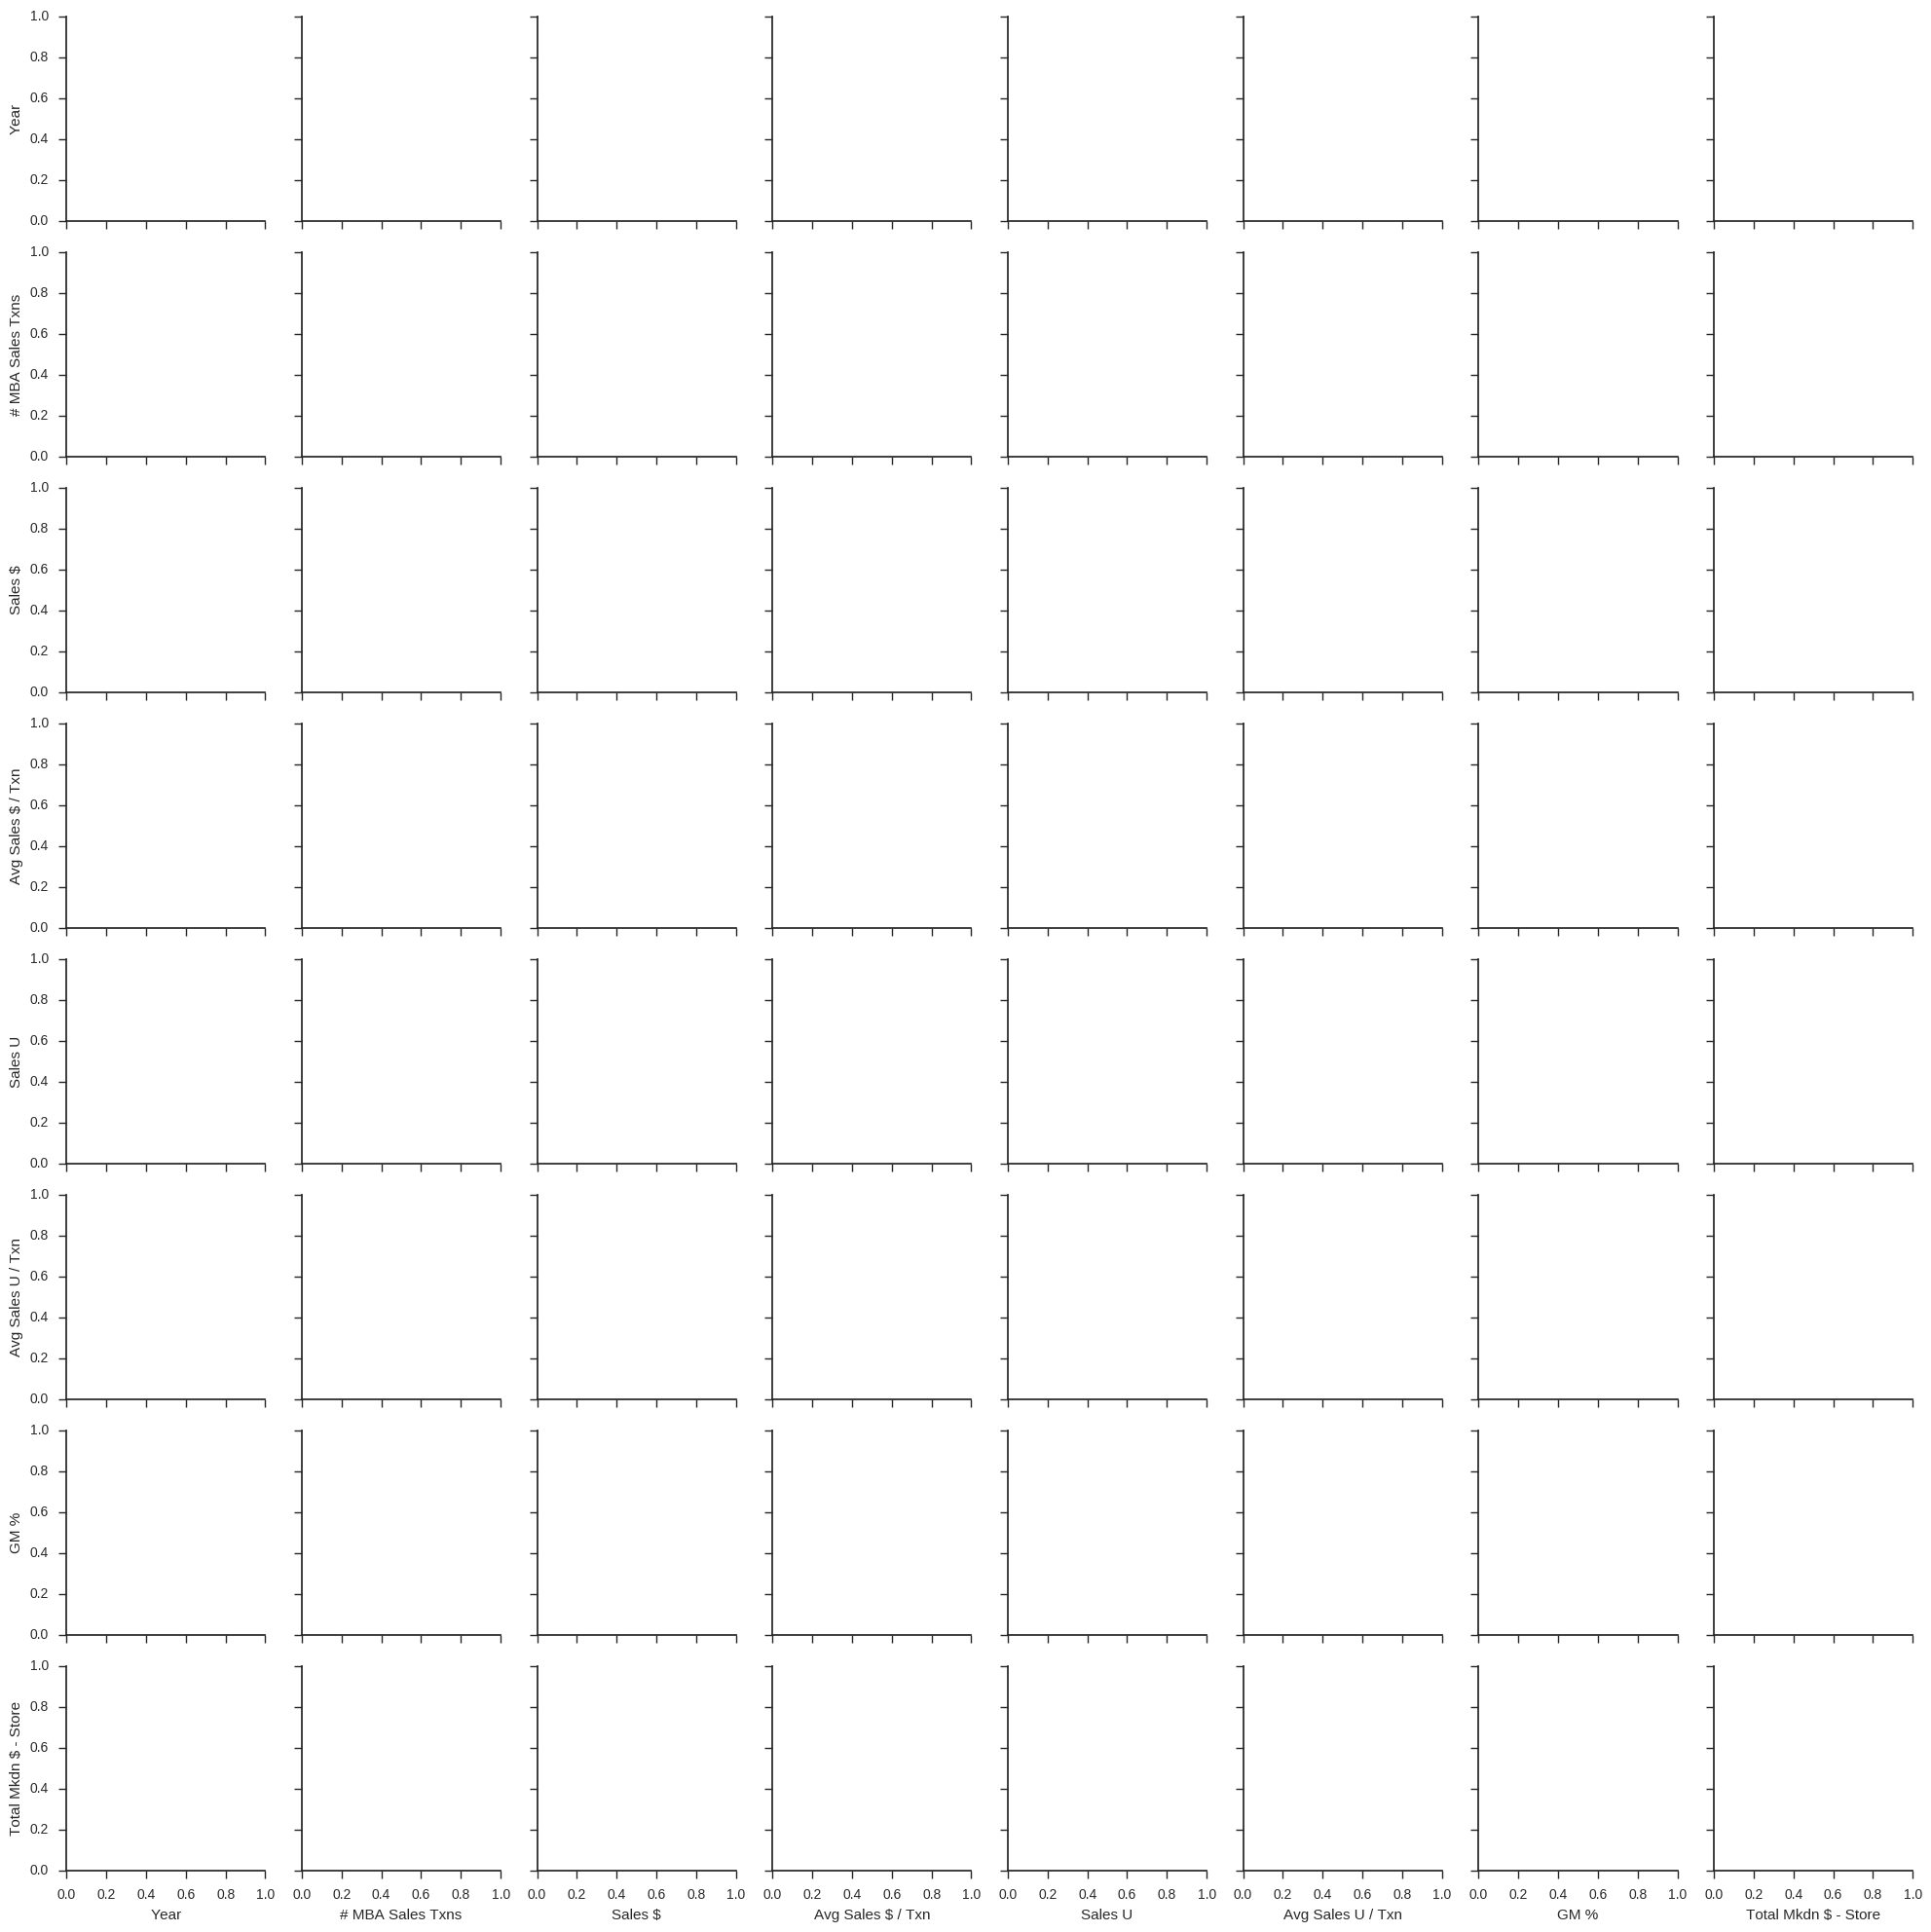

In [15]:
sns.pairplot(sales, hue="Day of Week", size=2.5);

In [16]:
sales_dow = sales[['Day of Week', '# MBA Sales Txns', 'Sales $', 'Sales U']]

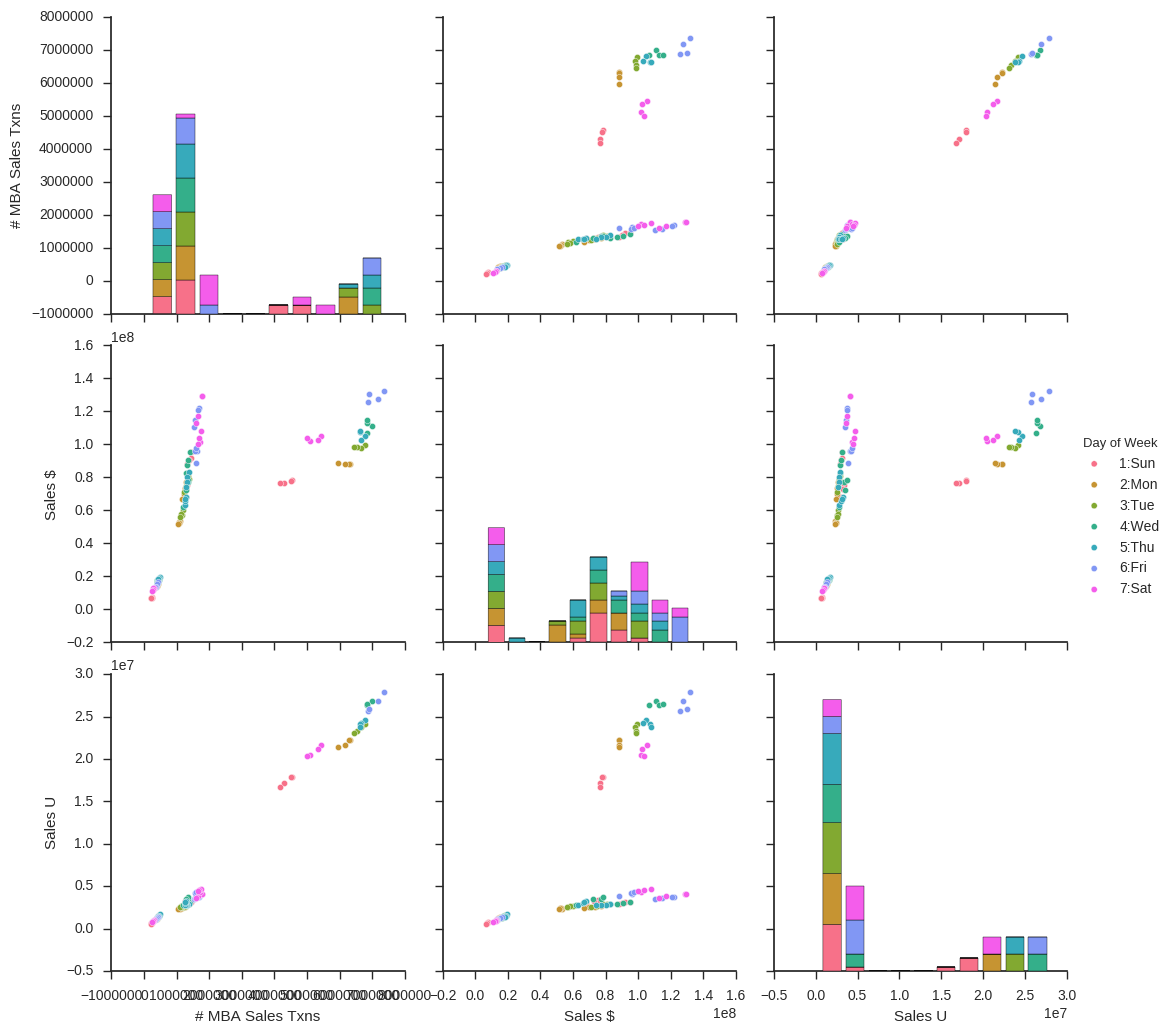

In [18]:
sns.pairplot(sales_dow, hue="Day of Week", size=3.5);

In [39]:
sales_dow_ly = sales[sales.Year == 2016]

In [49]:
sdly = sales_dow_ly.iloc[:, 2:]
sdly.head()

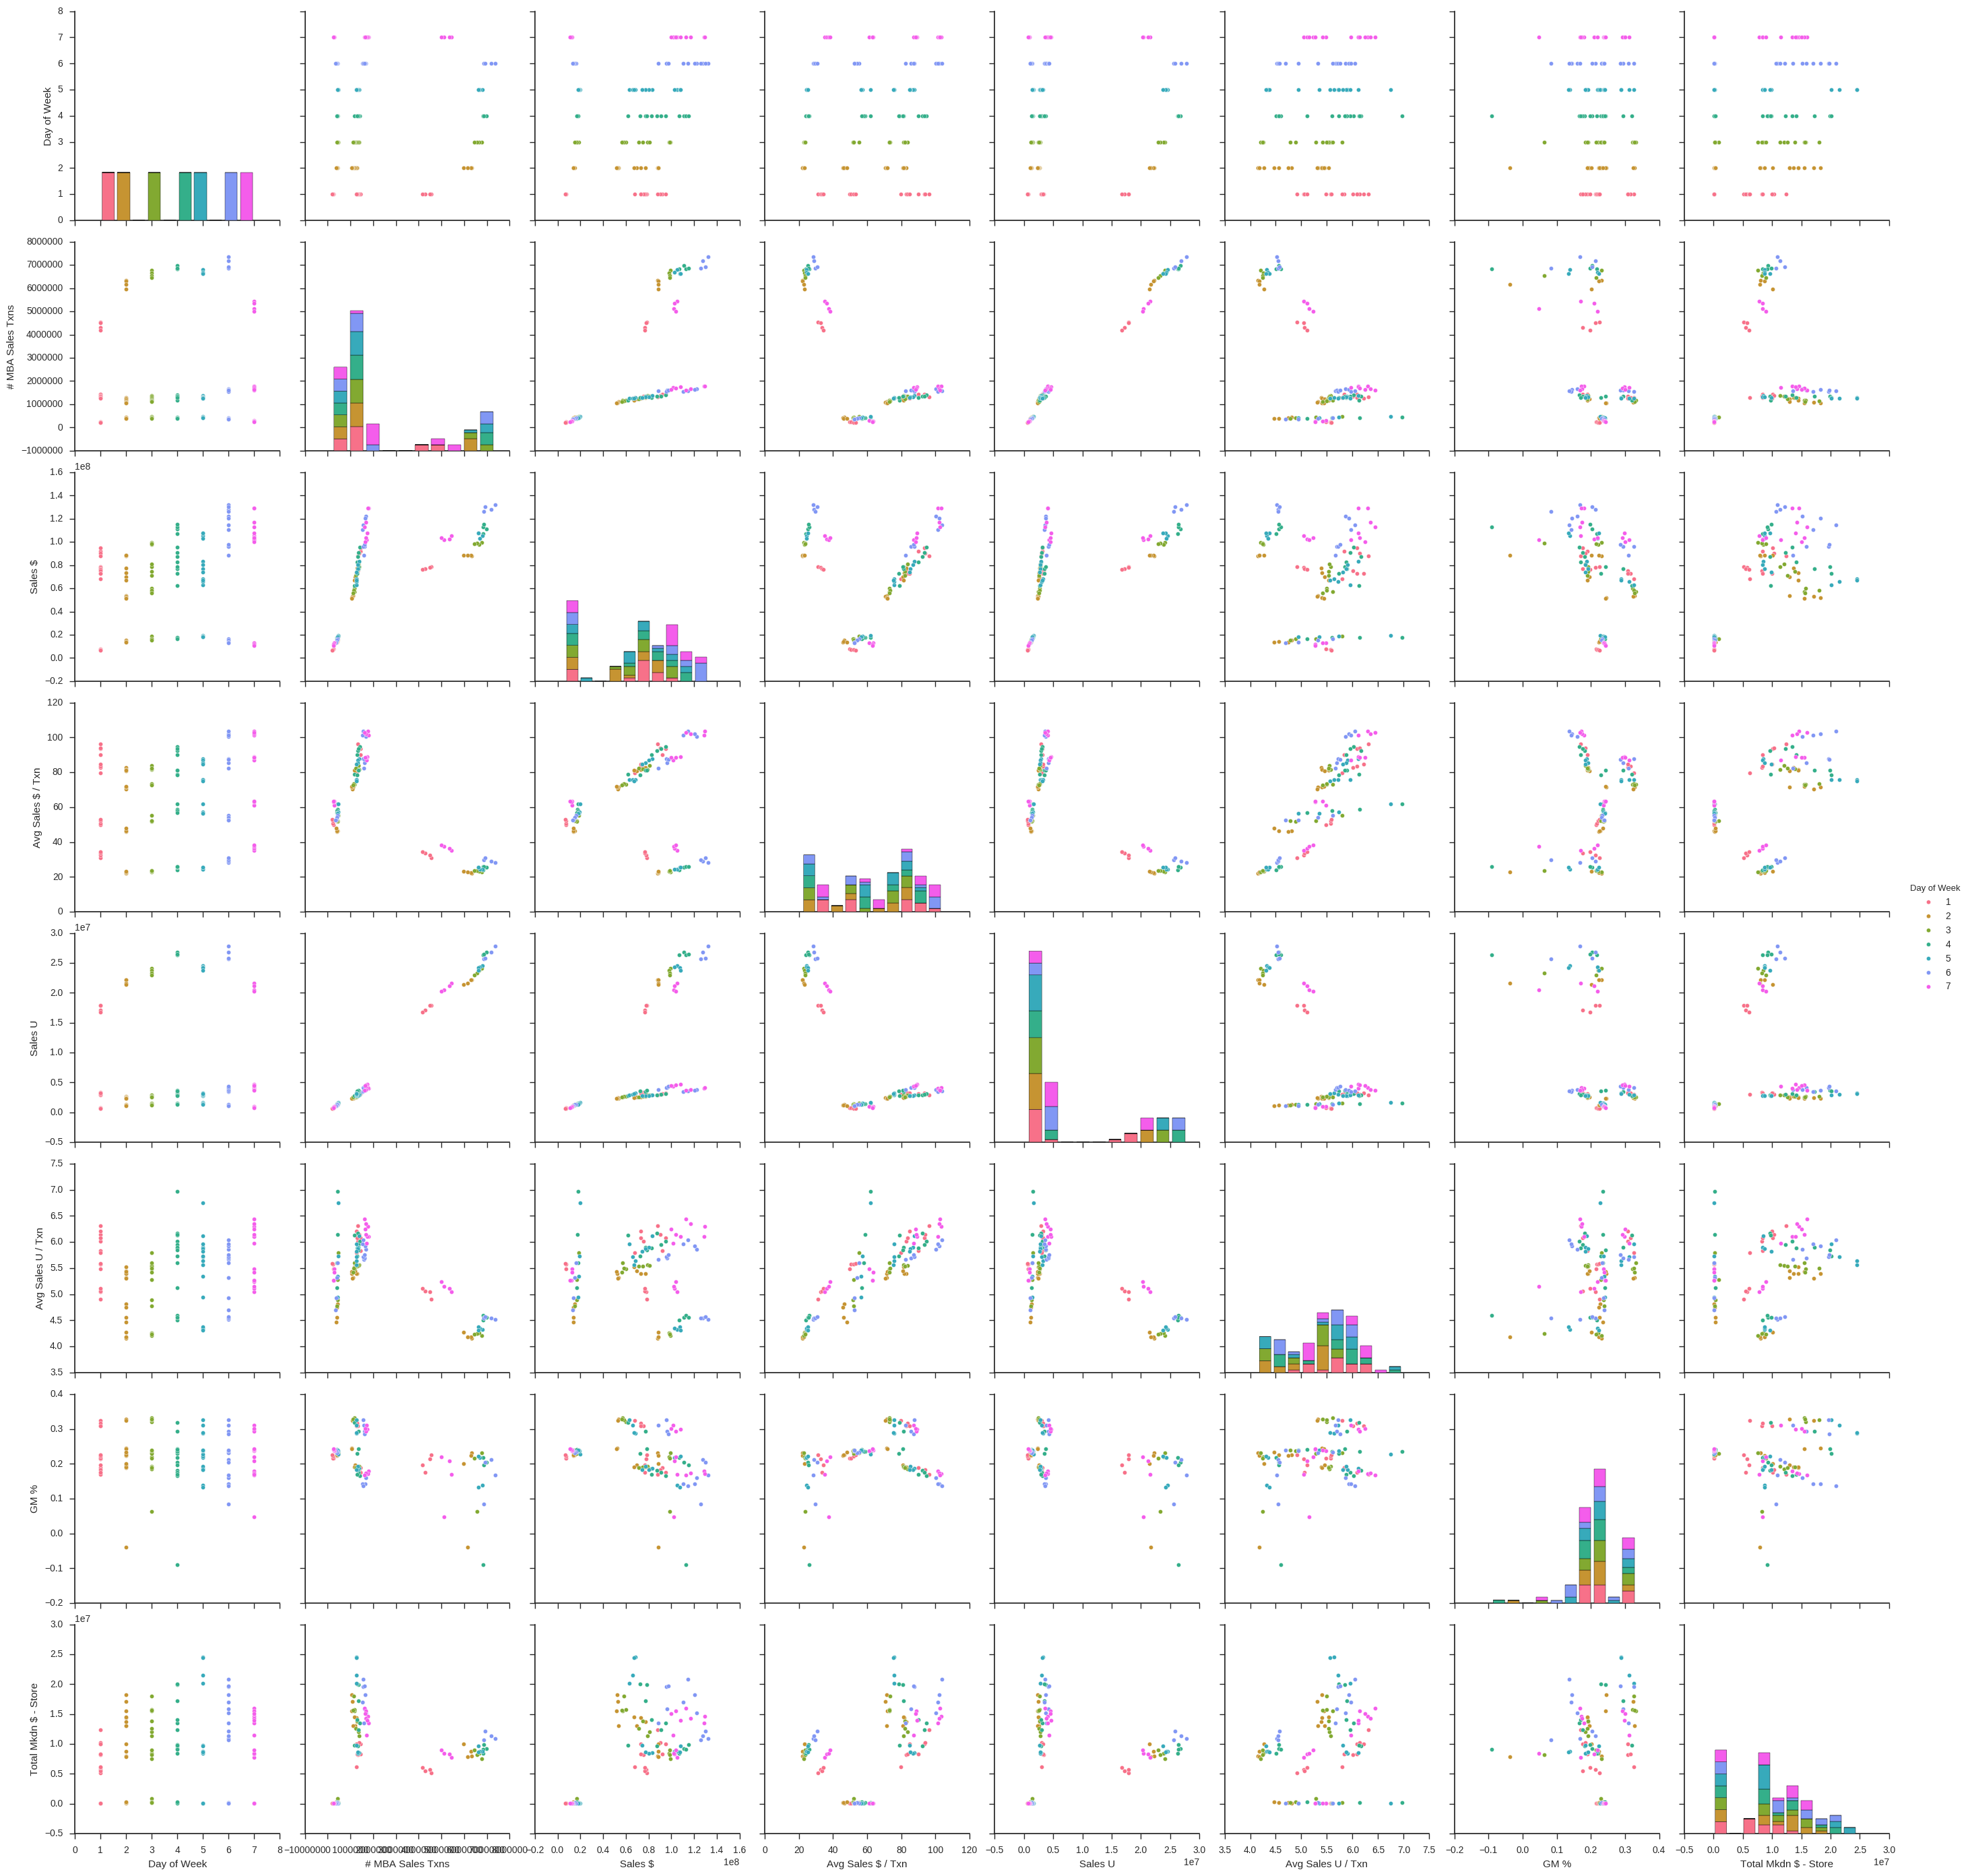

In [51]:
sns.pairplot(sdly, hue="Day of Week", size=3.5);